In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("boston_house_price.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
X=df.drop("MEDV",axis=1)
Y=df["MEDV"]

In [6]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [7]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

<AxesSubplot: >

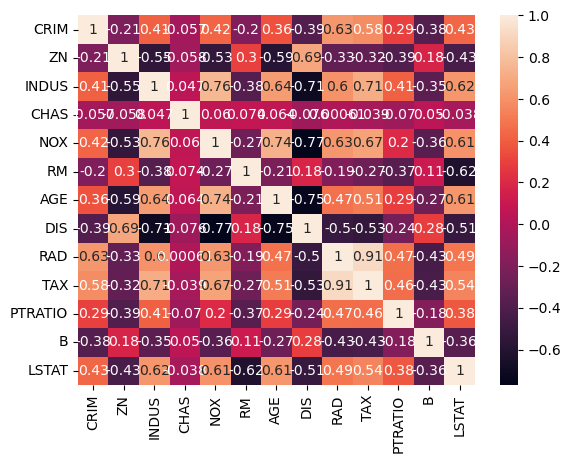

In [9]:
sns.heatmap(X_train.corr(),annot=True)

In [10]:
corr=X_train.corr()

In [17]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr   

In [12]:
corr_features=correlation(df,0.7)
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [13]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [14]:
X_train

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
78,0.05646,0.0,12.83,0,6.232,5,18.7,386.40,12.34
323,0.28392,0.0,7.38,0,5.708,5,19.6,391.13,11.74
174,0.08447,0.0,4.05,0,5.859,5,16.6,393.23,9.64
354,0.04301,80.0,1.91,0,5.663,4,22.0,382.80,8.05
337,0.03041,0.0,5.19,0,5.895,5,20.2,394.81,10.56
...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0,5.454,4,20.1,395.09,18.06
86,0.05188,0.0,4.49,0,6.015,3,18.5,395.99,12.86
287,0.03871,52.5,5.32,0,6.209,6,16.6,396.90,7.14
275,0.09604,40.0,6.41,0,6.854,4,17.6,396.90,2.98


In [15]:
X_test

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
340,0.06151,0.0,5.19,0,5.968,5,20.2,396.90,9.29
496,0.28960,0.0,9.69,0,5.390,6,19.2,396.90,21.14
112,0.12329,0.0,10.01,0,5.913,6,17.8,394.95,16.21
6,0.08829,12.5,7.87,0,6.012,5,15.2,395.60,12.43
433,5.58107,0.0,18.10,0,6.436,24,20.2,100.19,16.22
...,...,...,...,...,...,...,...,...,...
498,0.23912,0.0,9.69,0,6.019,6,19.2,396.90,12.92
163,1.51902,0.0,19.58,1,8.375,5,14.7,388.45,3.32
325,0.19186,0.0,7.38,0,6.431,5,19.6,393.68,5.08
328,0.06617,0.0,3.24,0,5.868,4,16.9,382.44,9.97
